# Data Compression Using K-means Clustering

- 기수: 13기

- 이름: 백승이

- 작성자: 12기 이정우

_본 과제는 Kibok Lee의 Statistical Machine Learning (STA3142) 과제에 참조하였음을 밝힙니다._

본 과제 문제에서는 K-means Clustering의 활용 중 하나인 이미지 데이터 압축(Data Compression)을 직접 구현하는 것을 목표로 합니다.

### 01. Setting

In [2]:
# Google colab을 사용하시는 분들은 아래의 주석을 제거하여 해당 셀을 실행해주신 후 진행하시면 됩니다.
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import pairwise_distances

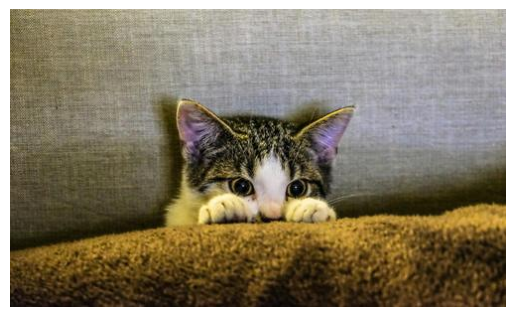

In [4]:
image_path = '/content/mydrive/MyDrive/DSL-1/겨울 정규세션/[0210]MachineLearning_FirstnameLASTNAME/data/cat.jpg' # 안된다면 절대 경로로 바꿔주세요!

plt.imshow(Image.open(image_path))
plt.axis('off')
plt.show()

해당 과제를 위해 필요한 function들

In [5]:
def read_image(image_path):
    image = Image.open(image_path)
    arr = np.array(image)
    arr_flatten = arr.reshape(-1, arr.shape[-1])
    return arr_flatten.astype(float) / 255. , arr.shape

def reconstruct_image(labels, centroids, image_shape):
    segmented_image = centroids[labels].reshape(image_shape)
    return (segmented_image * 255.).astype(np.uint8)

### 02. Implement EM Algorithm with K-means clustering

**EM Algorithm with K-means clustering**은 다음과 같은 과정으로 이루어집니다. 각 단계는 별도의 함수로 정의하여 구현할 예정입니다.

**(1) Random하게 K개의 중심점(centroids) 설정**

먼저 데이터 공간에서 K개의 클러스터 중심점을 무작위로 설정합니다. 이 작업은 **initialize_centroids** 함수에서 처리됩니다.

**(2) E-step (클러스터 할당)**

각 데이터 포인트를 가장 가까운 중심점에 할당하는 단계입니다. 이를 통해 데이터 포인트가 어느 클러스터에 속하는지를 결정합니다. 이 과정은 **assign_clusters** 함수로 구현됩니다.

**(3) M-step (중심점 업데이트)**

각 클러스터에 속하는 데이터 포인트들의 평균을 계산하여 새로운 중심점을 업데이트합니다. 이 과정은 **update_centroids** 함수에서 수행됩니다.

**(4) 수렴(convergence)까지 Step 2, 3 반복**

E-step과 M-step을 반복하여 중심점의 변화가 일정 기준 이하로 작아질 때까지 알고리즘을 수행합니다. 이 과제에서는 따로 구현하지는 않습니다.

이 과정은 최종적으로 **kmeans** 함수로 구현되며, 각 단계는 개별 함수로 정의되어 모듈화된 형태로 구현됩니다. (**kmeans** function 참고)

**(1) Random하게 K개의 중심점(centroids) 설정**

먼저 데이터 공간에서 K개의 클러스터 중심점을 무작위로 설정합니다.

In [6]:
def initialize_centroids(X, n_clusters):
    random_indices = np.random.choice(X.shape[0], n_clusters, replace=False)
    centroids = X[random_indices]
    return centroids

**TO DO**

**(2) E-step (클러스터 할당)** 을 수행하는 **assign_clusters** 함수와

**(3) M-step (중심점 업데이트)** 을 수행하는 **update_centroids** 를 구현하세요.


In [7]:
def assign_clusters(X, centroids):
    """
    Assigns each data point in X to the nearest centroid based on the pairwise distances.

    Parameters:
    - X: A numpy array of shape (N, 3), where N is the number of samples and 3 is RGB.
    - centroids: A numpy array of shape (n_clusters, 3), where n_clusters is the number of clusters and 3 is RGB.

    Returns:
    - labels: A numpy array of shape (N,), containing the index of the nearest centroid for each sample.
    """
    labels = np.zeros(X.shape[0])
    #### TO DO ####
    # Hint1: pairwise_distances
    distances = pairwise_distances(X, centroids)
    labels = np.argmin(distances, axis=1)

    ###############
    return labels


In [8]:
def update_centroids(X, labels, n_clusters):
    """
    Updates centroids by calculating the mean of all data points assigned to each cluster.

    Parameters:
    - X: A numpy array of shape (N, 3), where N is the number of samples and 3 is RGB.
    - labels: A numpy array of shape (N,), containing the cluster assignments for each sample.
    - n_clusters: An integer representing the number of clusters.

    Returns:
    - new_centroids: A numpy array of shape (n_clusters, 3), where n_clusters is the number of clusters and 3 is RGB.
    """
    new_centroids = np.zeros((n_clusters, 3))
    #### TO DO ####
    for i in range(n_clusters):
        # Get all the data points assigned to the current cluster
        cluster_points = X[labels == i]

        # Calculate the mean of these points and set it as the new centroid
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)

    ###############
    return new_centroids

**EM Algorithm with K-means clustering**

In [9]:
def kmeans(X, n_clusters, n_iters=20):
    centroids = initialize_centroids(X, n_clusters)

    for _ in range(n_iters):
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, n_clusters)

    return centroids, labels

### 03. Data Compression Using K-means Clustering

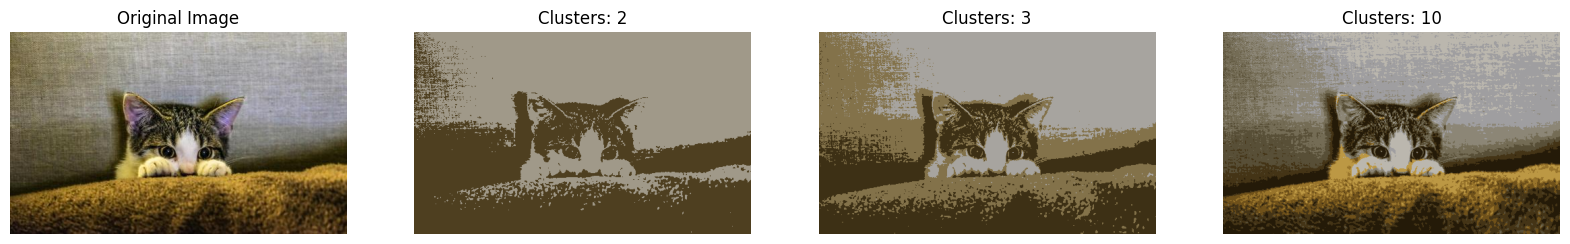

In [10]:
image, image_shape = read_image(image_path)
n_clusters_list = [2, 3, 10]

np.random.seed(2025)
fig, axes = plt.subplots(1, len(n_clusters_list) + 1, figsize=(20, 5))

axes[0].imshow(Image.open(image_path))
axes[0].axis('off')
axes[0].set_title('Original Image')

for i, n_clusters in enumerate(n_clusters_list):
    centroids, labels = kmeans(image, n_clusters)
    segmented_image = reconstruct_image(labels, centroids, image_shape)
    axes[i + 1].imshow(segmented_image)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'Clusters: {n_clusters}')

plt.show()

Q. 위의 결과를 통해 관찰할 수 있는 사실은 무엇인가요?

A. 클러스터 수가 적을수록 더 단순하고 적은 색상으로 이미지를 표현한다. 따라서 클러스터 수가 많으면 더 세밀한 표현이 가능합니다.

### (Optional) 04. Your Own Image!

본인이 해보고 싶은 이미지에 대해서 k-means clustering을 해보세요! (가능하면 jpg 이미지로 하시고, 이미지가 너무 크면 오래 걸릴 수 있습니다.)

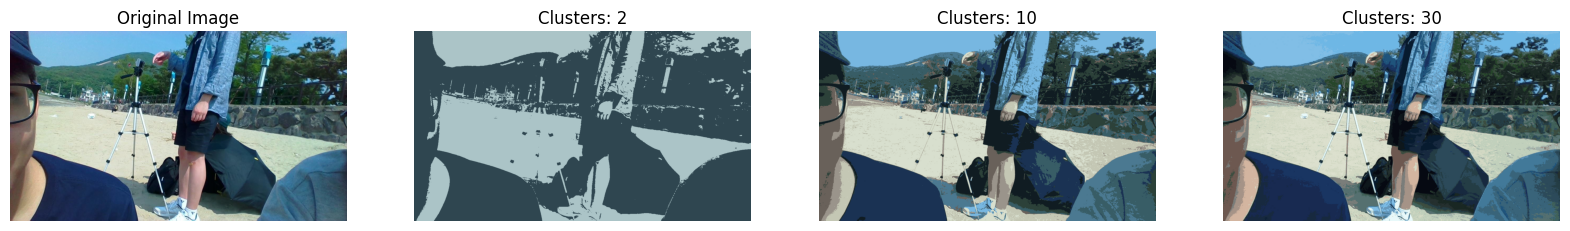

In [11]:
image_path = '/content/mydrive/MyDrive/DSL-1/겨울 정규세션/[0210]MachineLearning_FirstnameLASTNAME/data/19024715_1694106007551940_1487707081_o.jpg'
image, image_shape = read_image(image_path)
n_clusters_list = [2, 10, 30  ]

np.random.seed(2025)
fig, axes = plt.subplots(1, len(n_clusters_list) + 1, figsize=(20, 5))

axes[0].imshow(Image.open(image_path))
axes[0].axis('off')
axes[0].set_title('Original Image')

for i, n_clusters in enumerate(n_clusters_list):
    centroids, labels = kmeans(image, n_clusters)
    segmented_image = reconstruct_image(labels, centroids, image_shape)
    axes[i + 1].imshow(segmented_image)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'Clusters: {n_clusters}')

plt.show()